In [356]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from scipy.io import arff
import pgmpy
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore
from sklearn.metrics import f1_score
import networkx as nx
from matplotlib import pyplot as plt
from sklearn import preprocessing
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import correlation_score, log_likelihood_score, structure_score
from pgmpy.inference import VariableElimination, EliminationOrder
from  pgmpy.inference.EliminationOrder import WeightedMinFill

Data using downloaded files

Description of Attributes


X1	net profit / total assets\
X2	total liabilities / total assets\
X3	working capital / total assets\
X4	current assets / short-term liabilities\
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365\
X6	retained earnings / total assets\
X7	EBIT / total assets\
X8	book value of equity / total liabilities\
X9	sales / total assets\
X10	equity / total assets\
X11	(gross profit + extraordinary items + financial expenses) / total assets\
X12	gross profit / short-term liabilities\
X13	(gross profit + depreciation) / sales\
X14	(gross profit + interest) / total assets\
X15	(total liabilities * 365) / (gross profit + depreciation)\
X16	(gross profit + depreciation) / total liabilities\
X17	total assets / total liabilities\
X18	gross profit / total assets\
X19	gross profit / sales\
X20	(inventory * 365) / sales\
X21	sales (n) / sales (n-1)\
X22	profit on operating activities / total assets\
X23	net profit / sales\
X24	gross profit (in 3 years) / total assets\
X25	(equity - share capital) / total assets\
X26	(net profit + depreciation) / total liabilities\
X27	profit on operating activities / financial expenses\
X28	working capital / fixed assets\
X29	logarithm of total assets\
X30	(total liabilities - cash) / sales\
X31	(gross profit + interest) / sales\
X32	(current liabilities * 365) / cost of products sold\
X33	operating expenses / short-term liabilities\
X34	operating expenses / total liabilities\
X35	profit on sales / total assets\
X36	total sales / total assets\
X37	(current assets - inventories) / long-term liabilities\
X38	constant capital / total assets\
X39	profit on sales / sales\
X40	(current assets - inventory - receivables) / short-term liabilities\
X41	total liabilities / ((profit on operating activities + depreciation) * (12/365))\
X42	profit on operating activities / sales\
X43	rotation receivables + inventory turnover in days\
X44	(receivables * 365) / sales\
X45	net profit / inventory\
X46	(current assets - inventory) / short-term liabilities\
X47	(inventory * 365) / cost of products sold\
X48	EBITDA (profit on operating activities - depreciation) / total assets\
X49	EBITDA (profit on operating activities - depreciation) / sales\
X50	current assets / total liabilities\
X51	short-term liabilities / total assets\
X52	(short-term liabilities * 365) / cost of products sold)\
X53	equity / fixed assets\
X54	constant capital / fixed assets\
X55	working capital\
X56	(sales - cost of products sold) / sales\
X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)\
X58	total costs /total sales\
X59	long-term liabilities / equity\
X60	sales / inventory\
X61	sales / receivables\
X62	(short-term liabilities *365) / sales\
X63	sales / short-term liabilities\
X64	sales / fixed assets\

In [357]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from scipy.io import arff
 
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')

df = pd.DataFrame(arff_file_year_5[0])
print("data frame")
df

data frame


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,b'0'
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,b'0'
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,b'0'
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,b'0'
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


Standardizing Data

In [358]:
data = df.dropna()
#print("describe data")
#data.describe()
#print("data")
data
scaler = preprocessing.StandardScaler() 
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()
#print(data)
#print(data_scaled_transposed)

attribute_names = [
    "X1:net profit / total assets",
    "X2:total liabilities / total assets",
    "X3:working capital / total assets",
    "X4:current assets / short-term liabilities",
    "X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "X6:retained earnings / total assets",
    "X7:EBIT / total assets",
    "X8:book value of equity / total liabilities",
    "X9:sales / total assets",
    "X10:equity / total assets",
    "X11:(gross profit + extraordinary items + financial expenses) / total assets",
    "X12:gross profit / short-term liabilities",
    "X13:(gross profit + depreciation) / sales",
    "X14:(gross profit + interest) / total assets",
    "X15:(total liabilities * 365) / (gross profit + depreciation)",
    "X16:(gross profit + depreciation) / total liabilities",
    "X17:total assets / total liabilities",
    "X18:gross profit / total assets",
    "X19:gross profit / sales",
    "X20:(inventory * 365) / sales",
    "X21:sales (n) / sales (n-1)",
    "X22:profit on operating activities / total assets",
    "X23:net profit / sales",
    "X24:gross profit (in 3 years) / total assets",
    "X25:(equity - share capital) / total assets",
    "X26:(net profit + depreciation) / total liabilities",
    "X27:profit on operating activities / financial expenses",
    "X28:working capital / fixed assets",
    "X29:logarithm of total assets",
    "X30:(total liabilities - cash) / sales",
    "X31:(gross profit + interest) / sales",
    "X32:(current liabilities * 365) / cost of products sold",
    "X33:operating expenses / short-term liabilities",
    "X34:operating expenses / total liabilities",
    "X35:profit on sales / total assets",
    "X36:total sales / total assets",
    "X37:(current assets - inventories) / long-term liabilities",
    "X38:constant capital / total assets",
    "X39:profit on sales / sales",
    "X40:(current assets - inventory - receivables) / short-term liabilities",
    "X41:total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "X42:profit on operating activities / sales",
    "X43:rotation receivables + inventory turnover in days",
    "X44:(receivables * 365) / sales",
    "X45:net profit / inventory",
    "X46:(current assets - inventory) / short-term liabilities",
    "X47:(inventory * 365) / cost of products sold",
    "X48:EBITDA (profit on operating activities - depreciation) / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X50:current assets / total liabilities",
    "X51:short-term liabilities / total assets",
    "X52:(short-term liabilities * 365) / cost of products sold)",
    "X53:equity / fixed assets",
    "X54:constant capital / fixed assets",
    "X55:working capital",
    "X56:(sales - cost of products sold) / sales",
    "X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "X58:total costs /total sales",
    "X59:long-term liabilities / equity",
    "X60:sales / inventory",
    "X61:sales / receivables",
    "X62:(short-term liabilities *365) / sales",
    "X63:sales / short-term liabilities",
    "X64:sales / fixed assets",
    "class"
]

attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]

PreprocessedData = pd.DataFrame(attribute_dict)
PreprocessedData

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X10:equity / total assets,...,X56:(sales - cost of products sold) / sales,X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58:total costs /total sales,X59:long-term liabilities / equity,X60:sales / inventory,X61:sales / receivables,X62:(short-term liabilities *365) / sales,X63:sales / short-term liabilities,X64:sales / fixed assets,class
0,0.006675,0.020298,-0.549991,-0.177912,-0.026821,0.015309,0.023533,-0.436021,-0.212378,-0.037228,...,0.047814,0.056445,-0.063337,-0.061398,-0.060586,-0.168680,0.260014,-0.600041,-0.060357,-0.186612
1,-0.018488,0.019749,-0.191139,-0.141493,0.001511,-0.018198,0.018192,-0.325335,0.098282,-0.016289,...,0.956961,-0.010545,-0.379795,-0.037031,-0.056483,-0.195352,0.006140,-0.425176,-0.059265,-0.186612
2,0.013740,0.026062,0.804600,-0.074725,0.028825,0.002457,0.025071,-0.394679,-0.205756,-0.024309,...,0.091297,0.045787,-0.079589,-0.050342,-0.063188,-0.262796,0.170987,-0.549862,0.242290,-0.186612
3,0.000569,-0.024245,-0.205000,0.111450,0.067035,0.017573,0.021820,1.085581,-0.107515,0.039603,...,0.660574,-0.013864,-0.292251,-0.028822,-0.054666,-0.233976,-0.363210,0.252860,-0.090091,-0.186612
4,0.029792,-0.005250,0.578431,0.098201,0.028113,0.011754,0.028740,0.139460,-0.104604,0.015470,...,0.675798,0.023900,-0.297938,-0.014784,-0.064185,-0.126393,-0.319424,0.109898,-0.071364,-0.186612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.038095,0.045845,-0.288298,-0.160567,-0.111731,-0.017933,0.013690,-0.553075,-0.358066,-0.049443,...,0.741028,-0.025637,0.041929,-0.056773,-0.058150,-0.165322,1.110662,-0.835865,-0.060690,5.358702
3027,0.025709,0.015801,0.810300,-0.024371,-0.035626,-0.018198,0.024496,-0.275270,-0.146884,-0.011274,...,0.310132,0.044995,-0.145683,-0.015762,-0.068236,-0.067293,0.110051,-0.509422,-0.040946,5.358702
3028,0.021821,0.171451,-2.508343,-0.273537,-0.037083,-0.049744,0.023837,-0.899835,1.480498,-0.209015,...,-0.532193,-0.113658,0.025422,-0.260901,-0.052375,0.985693,-0.058324,-0.359948,-0.034938,5.358702
3029,-0.105120,0.119174,-1.764744,-0.234362,-0.064551,-0.141702,0.002338,-0.817851,0.620561,-0.142574,...,0.842352,0.055115,-0.328951,-0.137811,-0.063941,0.279127,0.366930,-0.649658,-0.026667,5.358702


Data discretization

In [359]:
#df['bucket']=pd.cut(df['marks'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])
#['Poor','Below_average','Average','Above_Average','Excellent']
#category_names = ['Subpar', 'Mediocre', 'Fair', 'Good', 'Superior', 'Outstanding', 'Exceptional', 'Remarkable', 'Extraordinary', 'Unparalleled']
category_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20']

atttributes = PreprocessedData.columns.values.tolist()


for i in range(len(atttributes)-1):
    #print(atttributes[i])
    #print(df[atttributes[i]].to_numpy())
    PreprocessedData[atttributes[i]] = pd.cut(PreprocessedData[atttributes[i]].to_numpy(),20,labels=category_names)
    
PreprocessedData[atttributes[len(atttributes)-1]]=pd.cut(PreprocessedData[atttributes[len(atttributes)-1]].to_numpy(),2,labels=['0','1'])
    
PreprocessedData

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X10:equity / total assets,...,X56:(sales - cost of products sold) / sales,X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58:total costs /total sales,X59:long-term liabilities / equity,X60:sales / inventory,X61:sales / receivables,X62:(short-term liabilities *365) / sales,X63:sales / short-term liabilities,X64:sales / fixed assets,class
0,C1,C20,C18,C1,C14,C4,C20,C1,C1,C1,...,C16,C7,C2,C14,C1,C1,C1,C1,C1,0
1,C1,C20,C18,C1,C14,C4,C20,C2,C1,C1,...,C17,C7,C1,C14,C1,C1,C1,C1,C1,0
2,C1,C20,C19,C1,C14,C4,C20,C2,C1,C1,...,C16,C7,C2,C14,C1,C1,C1,C1,C1,0
3,C1,C20,C18,C1,C14,C4,C20,C4,C1,C1,...,C17,C7,C1,C14,C1,C1,C1,C2,C1,0
4,C1,C20,C19,C1,C14,C4,C20,C2,C1,C1,...,C17,C7,C1,C14,C1,C1,C1,C2,C1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,C1,C20,C18,C1,C14,C4,C20,C1,C1,C1,...,C17,C7,C2,C14,C1,C1,C1,C1,C1,1
3027,C1,C20,C19,C1,C14,C4,C20,C2,C1,C1,...,C16,C7,C2,C14,C1,C1,C1,C1,C1,1
3028,C1,C20,C16,C1,C14,C4,C20,C1,C2,C1,...,C16,C7,C2,C14,C1,C1,C1,C1,C1,1
3029,C1,C20,C17,C1,C14,C4,C20,C1,C1,C1,...,C17,C7,C1,C14,C1,C1,C1,C1,C1,1


Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \







In [360]:
#keeping_attributes = ["Attr1","Attr23","Attr7","Attr49","Attr9","Attr3","Attr2","Attr59","Attr6","Attr4","Attr51","Attr8","class"]
keeping_attributes = [
    "X23:net profit / sales",
    "X1:net profit / total assets",
    "X7:EBIT / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X9:sales / total assets",
    "X3:working capital / total assets",
    "X2:total liabilities / total assets",
    "X59:long-term liabilities / equity",
    "X6:retained earnings / total assets",
    "X4:current assets / short-term liabilities",
    "X51:short-term liabilities / total assets",
    "X8:book value of equity / total liabilities",
    "class"
]

for attribute in PreprocessedData.columns.values.tolist():
    if attribute not in keeping_attributes:
        del PreprocessedData[attribute]

PreprocessedData

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X23:net profit / sales,X49:EBITDA (profit on operating activities - depreciation) / sales,X51:short-term liabilities / total assets,X59:long-term liabilities / equity,class
0,C1,C20,C18,C1,C4,C20,C1,C1,C20,C20,C1,C14,0
1,C1,C20,C18,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
2,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
3,C1,C20,C18,C1,C4,C20,C4,C1,C20,C20,C1,C14,0
4,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,C1,C20,C18,C1,C4,C20,C1,C1,C20,C20,C2,C14,1
3027,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,1
3028,C1,C20,C16,C1,C4,C20,C1,C2,C20,C20,C2,C14,1
3029,C1,C20,C17,C1,C4,C20,C1,C1,C20,C20,C2,C14,1


Split Data into training and testing

In [361]:

from math import floor


processed_bankrupt = PreprocessedData.loc[PreprocessedData["class"] == '1']
processed_nonbunkrupt = PreprocessedData.loc[PreprocessedData["class"] == '0']
#results_bankrupt
#result_nonbunkrupt
processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])
testing_data


,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X23:net profit / sales,X49:EBITDA (profit on operating activities - depreciation) / sales,X51:short-term liabilities / total assets,X59:long-term liabilities / equity,class
2197,C1,C20,C19,C1,C4,C20,C3,C1,C20,C20,C1,C14,0
2198,C1,C20,C18,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
2199,C1,C20,C19,C1,C4,C20,C4,C1,C20,C20,C1,C14,0
2200,C1,C20,C18,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
2201,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,C1,C20,C18,C1,C4,C20,C1,C1,C20,C20,C2,C14,1
3027,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,1
3028,C1,C20,C16,C1,C4,C20,C1,C2,C20,C20,C2,C14,1
3029,C1,C20,C17,C1,C4,C20,C1,C1,C20,C20,C2,C14,1


Bayesian Network stuff

In [362]:
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_array(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_array(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )

    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)

Structure Learning

In [363]:
scoring_method = K2Score(data=training_data)
est = HillClimbSearch(data=training_data, use_cache = True)
estimated_model = est.estimate(
    scoring_method=scoring_method, max_iter=int(1e4)
)
model = BayesianNetwork(estimated_model.edges())
print(model.nodes())
print(model.edges())
#get_f1_score(estimated_model, model)

  0%|          | 33/10000 [00:00<04:56, 33.65it/s]

['X3:working capital / total assets', 'X8:book value of equity / total liabilities', 'X4:current assets / short-term liabilities', 'X23:net profit / sales', 'X51:short-term liabilities / total assets', 'X6:retained earnings / total assets', 'X9:sales / total assets', 'class', 'X49:EBITDA (profit on operating activities - depreciation) / sales', 'X59:long-term liabilities / equity']
[('X3:working capital / total assets', 'X8:book value of equity / total liabilities'), ('X4:current assets / short-term liabilities', 'X8:book value of equity / total liabilities'), ('X4:current assets / short-term liabilities', 'X3:working capital / total assets'), ('X4:current assets / short-term liabilities', 'X23:net profit / sales'), ('X4:current assets / short-term liabilities', 'X51:short-term liabilities / total assets'), ('X23:net profit / sales', 'X8:book value of equity / total liabilities'), ('X23:net profit / sales', 'X3:working capital / total assets'), ('X23:net profit / sales', 'X51:short-ter

Display Graph

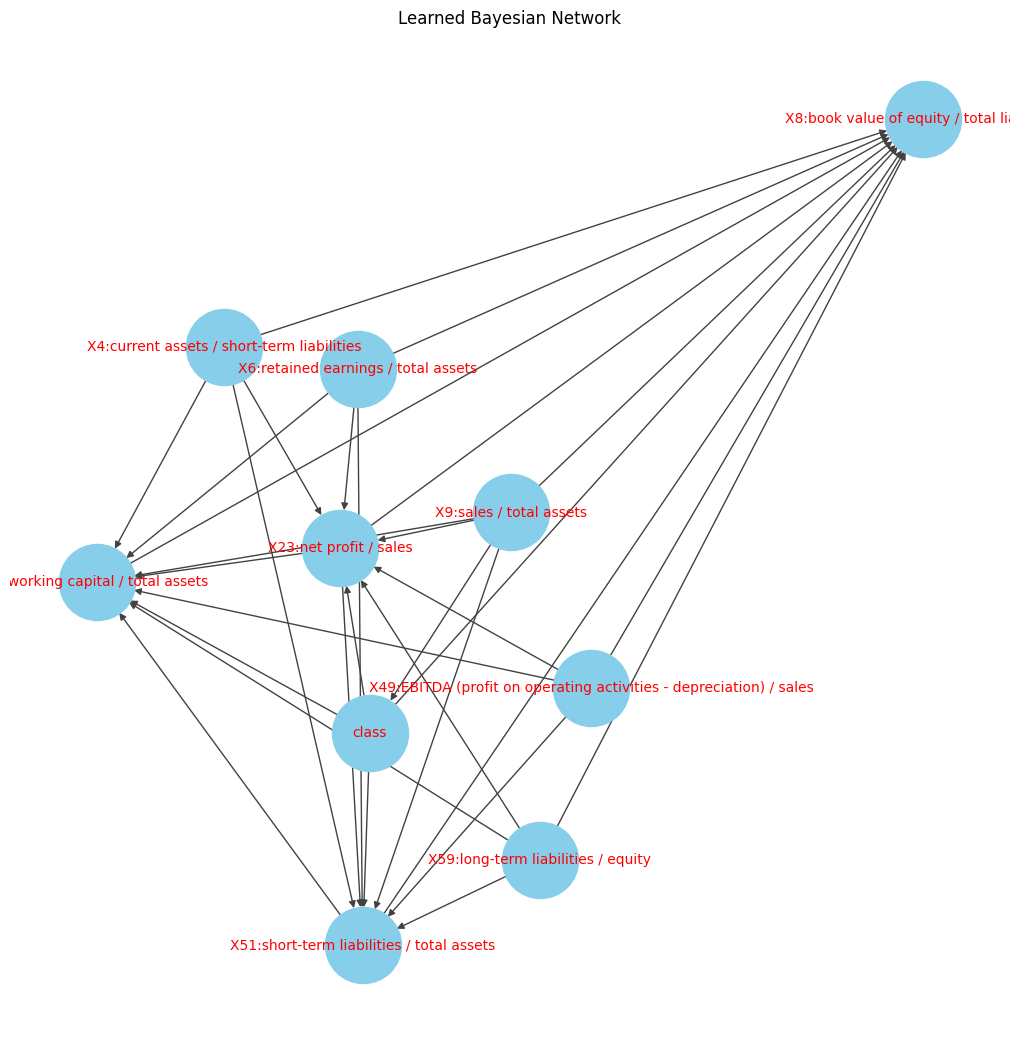

In [364]:
nx_graph = nx.DiGraph(estimated_model.edges())
pos = nx.spring_layout(nx_graph)
plt.figure(figsize=(10, 10))
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color = 'skyblue', edge_color='#424242',font_size=10,font_color='red')
plt.title('Learned Bayesian Network')
plt.show()

Parameter Estimation

In [365]:
estimator = BayesianEstimator(model, training_data)
cpd_C = estimator.estimate_cpd('class', prior_type="dirichlet",pseudo_counts=[[1, 1, 1],[2, 2, 2]])
print(cpd_C)
#parameters = estimator.get_parameters(prior_type='dirichlet',pseudo_counts=[[1, 1, 1],[2, 2, 2]])
parameters = estimator.get_parameters(prior_type='BDeu', equivalent_sample_size=5)
parameters

for i in range(len(parameters)):
    model.add_cpds(parameters[i])
    
model.check_model()

+-------------------------+-----+-----------------------------+
| X9:sales / total assets | ... | X9:sales / total assets(C3) |
+-------------------------+-----+-----------------------------+
| class(0)                | ... | 0.2857142857142857          |
+-------------------------+-----+-----------------------------+
| class(1)                | ... | 0.7142857142857143          |
+-------------------------+-----+-----------------------------+


True

Inference

In [369]:
inference = VariableElimination(model)
#print(training_data.columns.values.tolist())
elimination_order = WeightedMinFill(model).get_elimination_order(model.nodes())
elimination_order.remove('class')
bunkrupt_or_not = inference.query(["class"],elimination_order=elimination_order)
print(bunkrupt_or_not)

Eliminating: X9:sales / total assets: 100%|██████████| 1/1 [00:00<?, ?it/s]

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.9655 |
+----------+--------------+
| class(1) |       0.0345 |
+----------+--------------+


Testing Model

In [370]:
data_testing_corr_score = model.simulate(int(1e4))
correlation_score = correlation_score(model, data_testing_corr_score, test="chi_square", significance_level=0.05)
log_likelihood_score = log_likelihood_score(model, data_testing_corr_score)
structure_score = structure_score(model, data_testing_corr_score, scoring_method="bic")
print("correlation score: " + str(correlation_score))
print("Log likelihood score: " + str(log_likelihood_score))
print("Structure score: "+ str(structure_score))


Generating for node: X51:short-term liabilities / total assets:   0%|          | 0/10 [00:00<?, ?it/s]                         WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
Generating for node: X3:working capital / total assets:   0%|          | 0/10 [00:00<?, ?it/s]        WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
Generating for node: X8:book value of equity / total liabilities:   0%|          | 0/10 [00:00<?, ?it/s]WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
Generating for node: X8:book value of equity / total liabilities: 100%|██████████| 10/10 [00:00<00:00, 135.36it/s]
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataF

correlation score: 0.9655172413793104
Log likelihood score: -30009.293364860092
Structure score: -53059249.355220765
